# Notebook dedicated to study and explore decision trees standard python functions 

## From Kaggle example 1

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df_iris = pd.read_csv("Iris.csv")

# Removing the unnecessary column
df_iris.drop('Id',axis=1,inplace=True)

df_iris_X = df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(df_iris_X, df_iris_y)

DecisionTreeClassifier(max_depth=2, random_state=36)

## From Kaggle example 2

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv("car_evaluation.csv")

Let's inspect data

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.shape

(1727, 7)

Rename columns

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Let's count values

In [9]:
for col in col_names:
    print(df[col].value_counts())   

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


__class__ is the target variable, let's explore it

In [10]:
df["class"]

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

It is ordinal in nature

Let's find for missing values

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Declare feature vector and target variable

In [12]:
X=df.drop(["class"], axis=1) # Removing class column

y=df["class"] # Target variable

Now let's sepparate data into the train and test sets with the well-known scikitlearn function

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

Feature engineering

In [15]:
# Checking data types
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


They are ordinal cathegorical

In [17]:
import category_encoders as ce

Encode variables with ordinal encoding

In [18]:
# In the Kaggle example no dict has been parsed with the mapping values. 
# So the ordinal advantadge here is merely accidental as if no dictionary is parsed, 
# numerical values would not follow the original order.
# Later I will try with a custom order.
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


### Scikit learn decision tree classifier with gini index

In [21]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [22]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

making predictions

In [24]:
y_pred_gini = clf_gini.predict(X_test)

Let's check ours model quality

In [25]:
from sklearn.metrics import accuracy_score

# Accuracy in the test set
print('Model accuracy score for test set with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score for test set with criterion gini index: 0.8053


In [26]:
# Accuracy in the train set
print('Model accuracy score for train set with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, clf_gini.predict(X_train))))

Model accuracy score for train set with criterion gini index: 0.7848


There is no sign of overfitting, in fact, I could suspect of an underfitting a little bit.

### Visualization of Decision trees for gini index example

In [27]:
import matplotlib.pyplot as plt

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

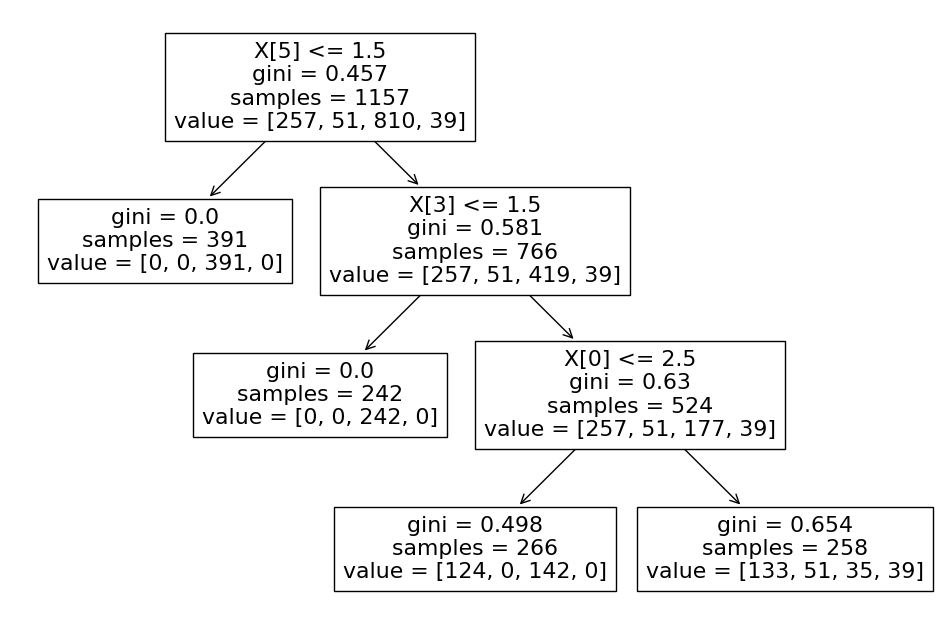

In [28]:
#Setting the figure size
plt.figure(figsize=(12,8))

#Plotting the tree
from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

Using _graphviz_

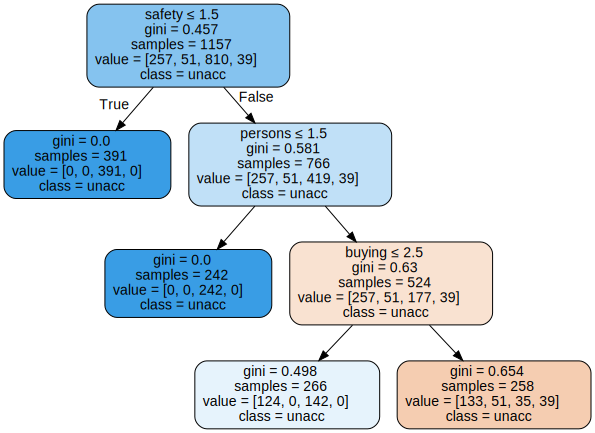

In [30]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

### Scikit learn decision tree classifier with entropy criterion (using formaly information gain)

In [31]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [41]:
# instantiate the DecisionTreeClassifier model with criterion gini index

#Defining the model
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

making predictions

In [42]:
y_pred_entropy = clf_entropy.predict(X_test)

Let's check ours model quality

In [44]:
from sklearn.metrics import accuracy_score

# Accuracy in the test set
print('Model accuracy score for test set with the entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score for test set with the entropy index: 0.8053


In [35]:
# Accuracy in the train set
print('Model accuracy score for train set with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, clf_gini.predict(X_train))))

Model accuracy score for train set with criterion gini index: 0.7848


There is no sign of overfitting, in fact, I could suspect of an underfitting a little bit.

### Visualization of Decision trees for gini index example

In [ ]:
import matplotlib.pyplot as plt

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

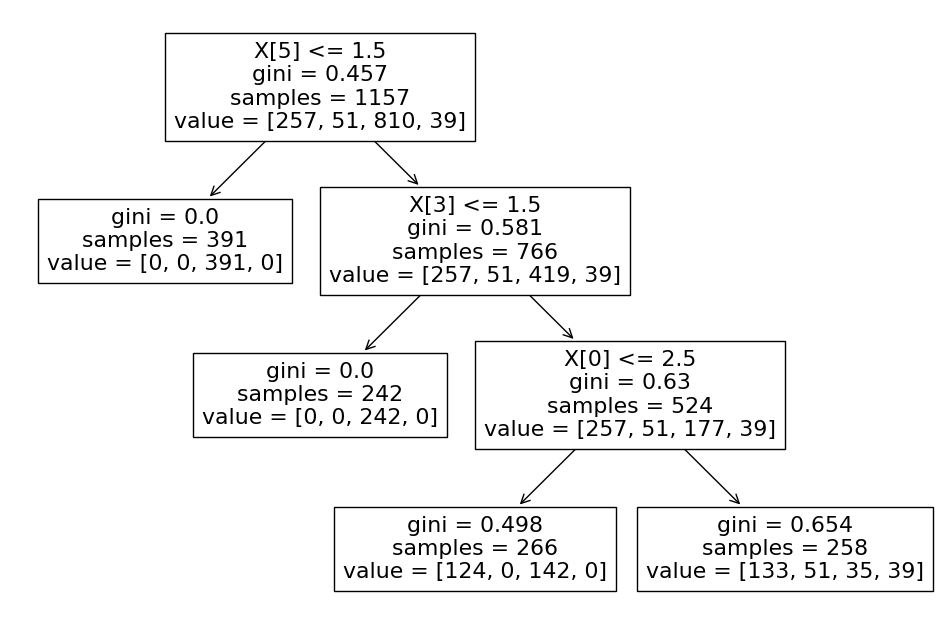

In [ ]:
#Setting the figure size
plt.figure(figsize=(12,8))

#Plotting the tree
from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

Using _graphviz_

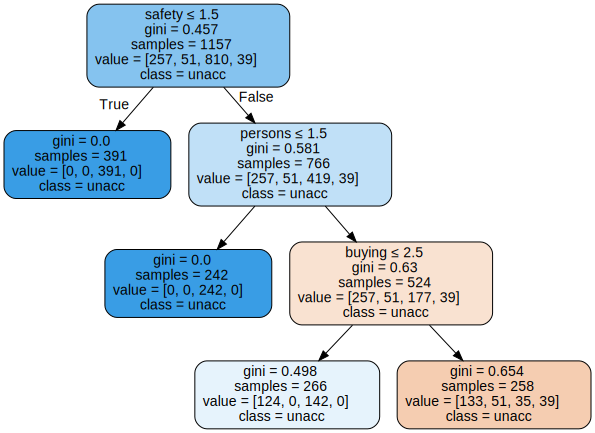

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 